# Daily Challenge: Pokemon Win Prediction Analysis

What you need to do:

1. Data Preparation
   - Load and merge pokemon.csv and combats.csv.
   - Fix missing values:
   - Fill the missing Name for Pokemon #62 (Primeape).
   - Handle NaN values in Type 2 (mark as “None” if missing).
   - Calculate each Pokemon’s win percentage using the combat data.
  

2. Exploratory Analysis & Visualization
    - Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.
    - Plot a Seaborn pairplot or PairGrid for stats vs. win percentage.
    - Analyze the top 10 Pokemon by win percentage and their stats.
    

3. Machine Learning
    - Split data into training/testing sets (80/20 split).
    - Train and evaluate 3 regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict win percentage.
    - Compare model performance using Mean Absolute Error (MAE).




### Data Preparation

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
sns.set_theme()

In [54]:
pokemon = pd.read_csv("pokemon.csv")
combats = pd.read_csv("combats.csv")

In [55]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [56]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [57]:
pokemon.loc[62, 'Name']="Primeape"

In [72]:
pokemon["Type 2"].fillna("None", inplace=True)

In [63]:
wins = (combats["Winner"].value_counts())

In [64]:
first_counts = combats['First_pokemon'].value_counts()
second_counts = combats['Second_pokemon'].value_counts()

total_games = first_counts.add(second_counts, fill_value=0)

win_percentage = (wins / total_games) * 100
win_percentage = win_percentage.sort_values(ascending=False)
win_percentage

155    98.449612
513    97.478992
704    96.800000
20     96.638655
154    96.453901
         ...    
237     3.252033
639     3.100775
190     2.459016
290     2.173913
231          NaN
Length: 784, dtype: float64

### Exploratory Analysis & Visualization

In [65]:
pokemon["Win Percentage"] = pokemon["#"].map(win_percentage).fillna(0)

In [76]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,27.819549
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,38.016529
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,67.424242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,56.000000
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,49.107143


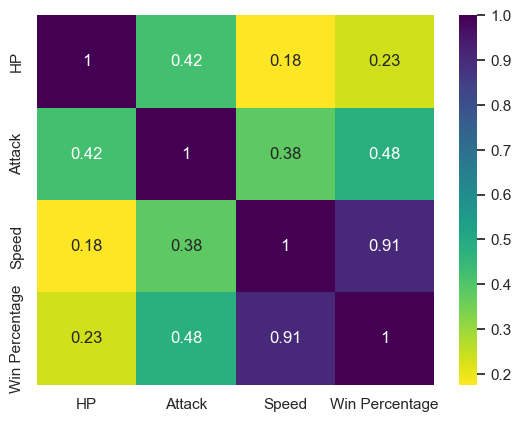

In [81]:
correlation_matrix = pokemon[["HP", "Attack", "Speed", "Win Percentage"]].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap = "viridis_r")
plt.show()

Speed correlates highly with Win Percentage.

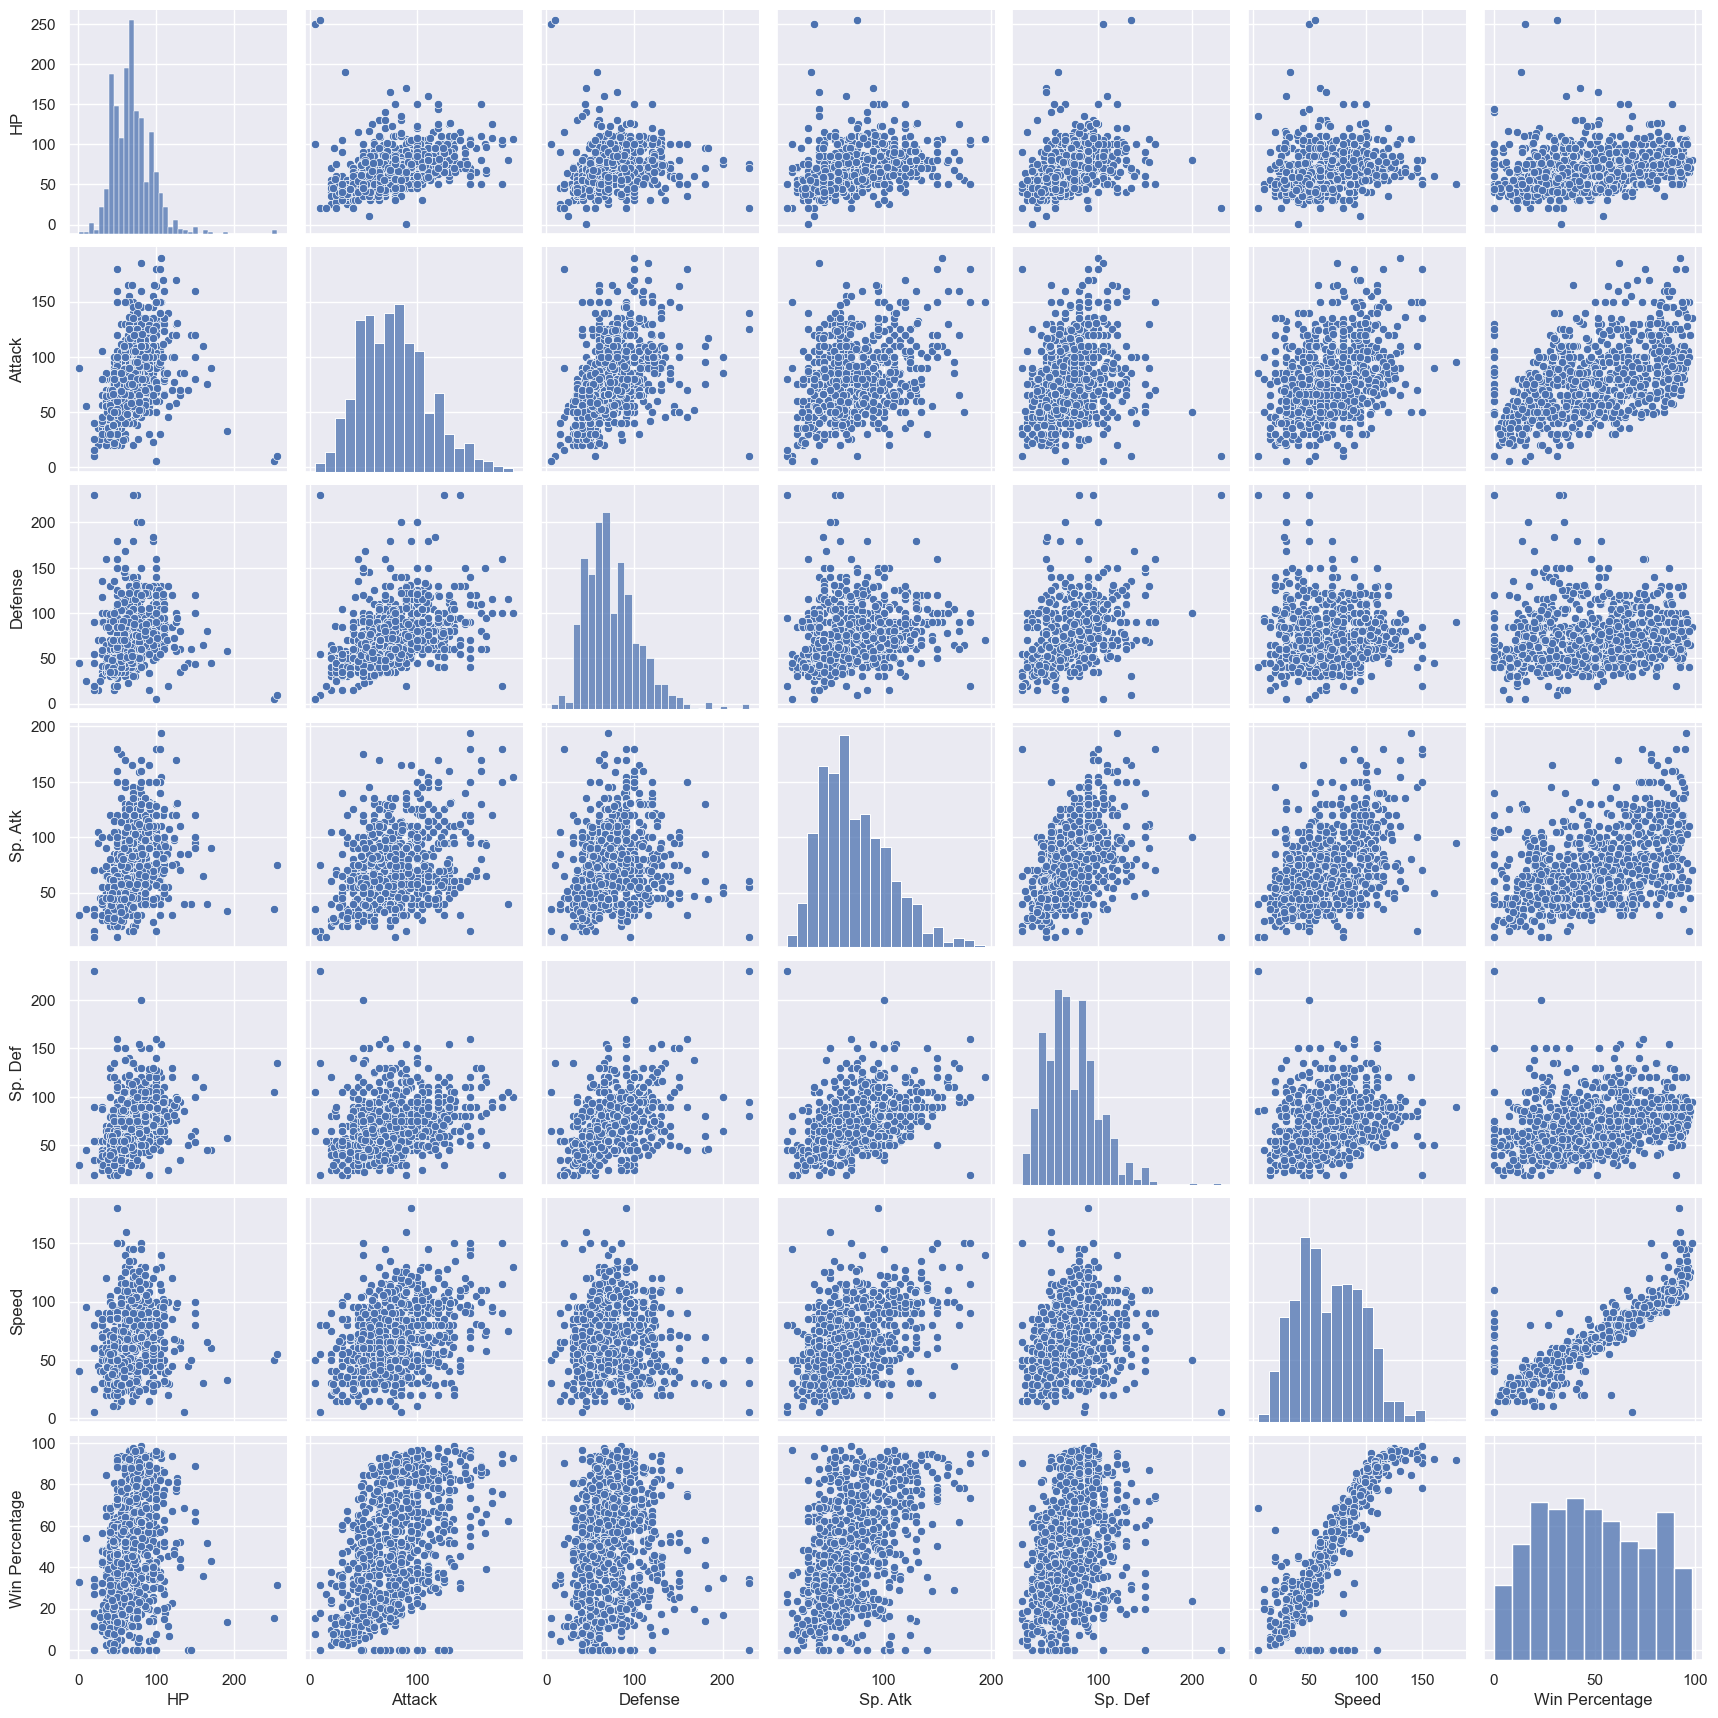

In [85]:
numeric_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Win Percentage"]
numeric_data = pokemon[numeric_cols]

sns.pairplot(numeric_data)
plt.show()

Speed shows a high correlation with Win Percentage again.

In [92]:
pokemon.sort_values(by = "Win Percentage", ascending = False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,98.449612
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,97.478992
703,704,Tornadus Therian Forme,Flying,None,79,100,80,110,90,121,5,True,96.800000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,96.638655
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,96.453901
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,96.124031
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,96.062992
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,95.934959
164,165,Mega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,95.200000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,95.000000


### Machine Learning

In [102]:
target ="Win Percentage" 
x = pokemon.drop([target, "Name", "Type 1", "Type 2"], axis = 1)

y = pokemon[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [105]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

print("Model Comparison (MAE):")
for model_name, mae in results.items():
    print(f"{model_name}: {mae}")

Model Comparison (MAE):
Linear Regression: 6.369106571481956
Random Forest: 5.6932960239320085
XGBoost: 6.203573718603999


The model with the best performance (lowest MAE) was Random Forest.